In [1]:
! git clone https://github.com/einstalek/DL-models-experiments.git

Cloning into 'DL-models-experiments'...
remote: Compressing objects: 100% (232/232), done.
remote: Total 324 (delta 199), reused 203 (delta 89), pack-reused 0
Receiving objects: 100% (324/324), 4.77 MiB | 7.93 MiB/s, done.
Resolving deltas: 100% (199/199), done.


In [2]:
import sys
sys.path.append("./DL-models-experiments/")

from models.unet import Unet
from models.pix2pix import train, Discriminator
from datasets.paired_dataset import PairedDataset

import numpy as np 
import os
import torch
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
train_data = PairedDataset("../input/facades-dataset/trainB/", "../input/facades-dataset/trainA/", split="train")
test_data = PairedDataset("../input/facades-dataset/testB/", "../input/facades-dataset/testA/", split="val")
train_loader = DataLoader(train_data, 16, drop_last=True, shuffle=True, num_workers=16)

In [4]:
gen = Unet(3, decoder_dropout=0.2)
disc = Discriminator()

train(gen, disc, train_loader, 10, "../working/")

In [ ]:
train(gen, disc, train_loader, 10, "../working/")

In [6]:
gen.eval();

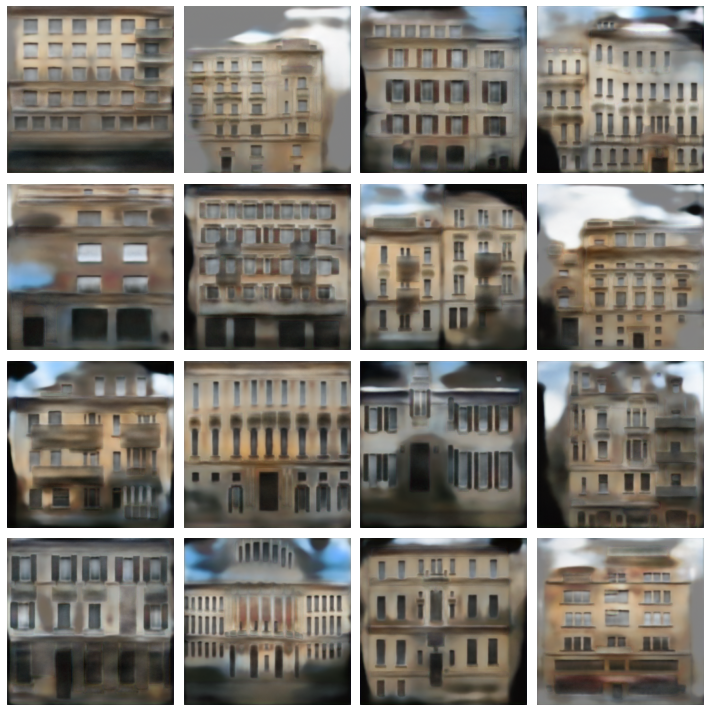

In [45]:
imgs = []

for i in range(16):
    img_a, img_b = test_data[i]
    fake_b = gen(img_a[None].cuda())
    imgs.append(fake_b[0].detach().cpu().numpy().transpose(1, 2, 0))
    
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(0.5 + 0.5  * imgs[i][... , ::-1])
    plt.axis('off')
plt.tight_layout()